In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('synthetic_asthma_dataset.csv')
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Patient_ID: ['ASTH100000' 'ASTH100001' 'ASTH100002' ... 'ASTH109997' 'ASTH109998'
 'ASTH109999']
Age: [52 15 72 61 21 83 87 75 88 24  3 22 53  2 30 38 64 60 33 76 58 89 49 59
 42 80 62 47 51 55  7 73 39 18  4 14  9 84 71 44  8 35 78 81 36 50  6 54
 63 34 74 48 40 85 82 26 41 29 45 65  1 11  5 28 12 23 37 86 27 79 77 43
 13 32 66 57 70 56 19 68 17 69 16 20 67 31 25 46 10]
Gender: ['Female' 'Male' 'Other']
BMI: [27.6 24.6 17.6 16.8 30.2 27.8 32.3 29.7 23.1 15.  28.  19.9 24.1 27.1
 21.8 20.9 23.5 19.8 23.8 20.3 22.4 22.8 35.6 28.8 24.4 27.2 29.6 26.4
 24.3 20.1 23.4 24.2 30.3 21.  20.6 21.4 22.  26.6 21.1 25.6 23.9 29.2
 26.8 22.2 31.  38.1 21.7 22.6 18.5 29.3 34.6 23.6 20.5 25.4 28.2 27.9
 18.8 23.2 25.  31.3 31.5 30.8 30.7 16.  31.1 29.9 20.2 18.1 17.9 16.7
 27.  20.4 28.3 32.8 24.5 21.6 29.5 26.2 33.9 36.4 19.5 26.3 26.5 22.9
 35.5 22.3 28.5 20.8 21.5 32.6 28.4 16.5 31.2 16.2 36.2 25.8 18.4 16.1
 27.3 33.4 30.6 22.7 18.  23.  19.6 21.2 27.7 22.5 25.5 19.1 24.9 19.2
 24.8 21.3 33.7 18.

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,2936
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
all_numerical_cols = df.select_dtypes(include=np.number).columns
num_cols = [col for col in all_numerical_cols if df[col].nunique() > 2]

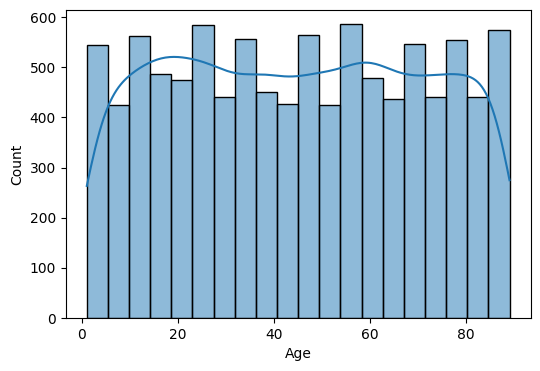

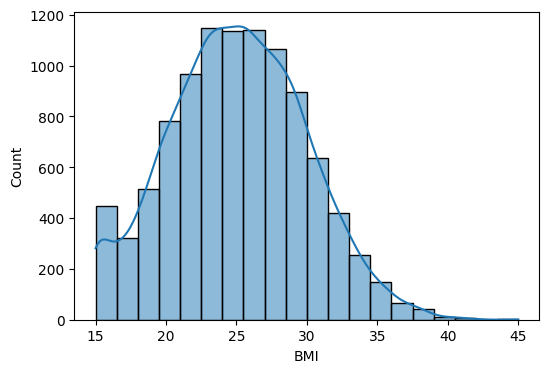

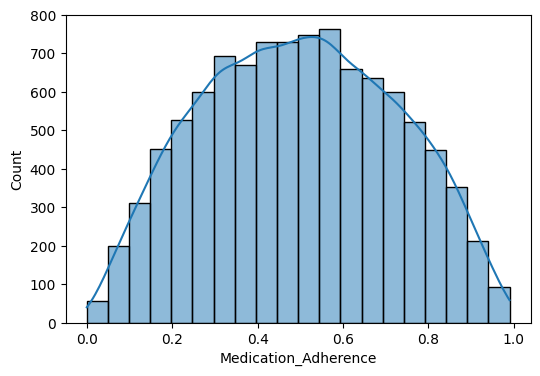

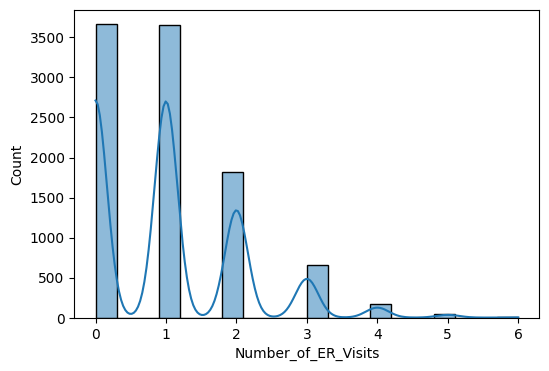

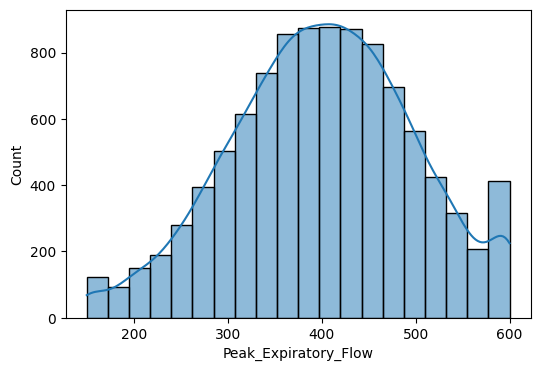

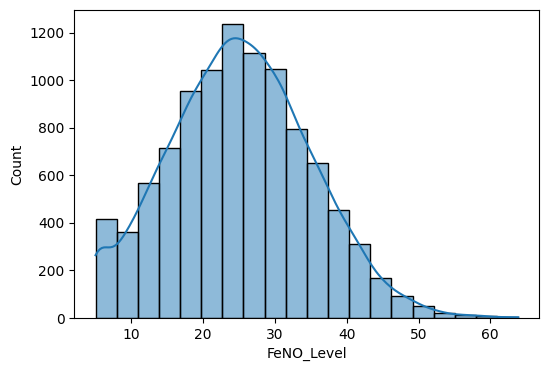

In [ ]:
for i in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[i], kde=True, bins=20)
  plt.show()

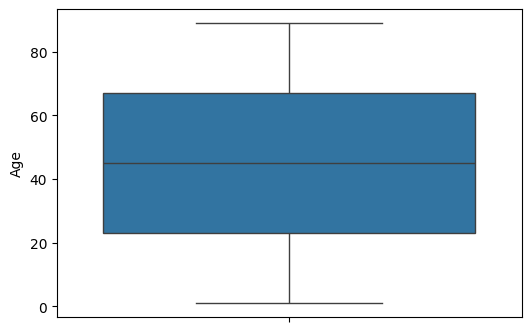

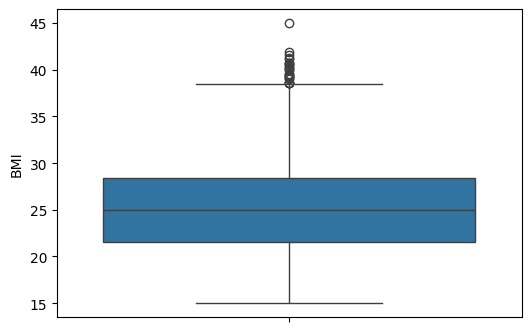

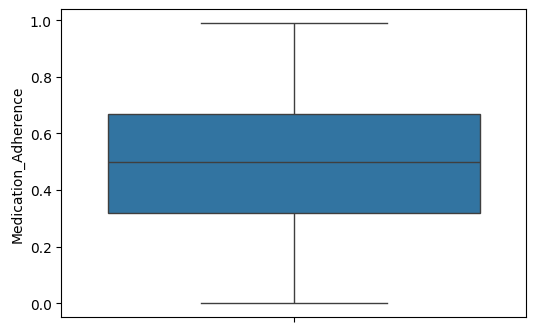

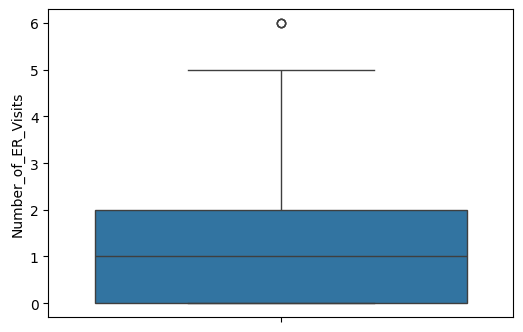

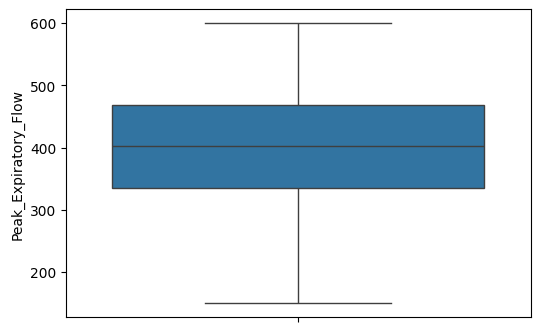

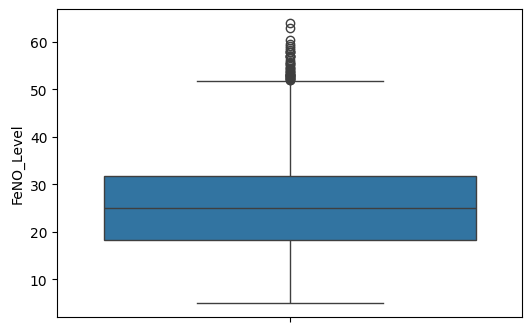

In [ ]:
for i in num_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(df[i])

In [ ]:
z_score_cols = [col for col in num_cols if col != 'Number_of_ER_Visits']
iqr_cols = ['Number_of_ER_Visits']

In [ ]:
z_score_outliers = {}

threshold = 3

for col in z_score_cols:
    series = df[col]
    z_scores = (series - series.mean()) / series.std()
    outliers = series[np.abs(z_scores) > threshold]

    if not outliers.empty:
        z_score_outliers[col] = outliers.values

In [ ]:
print(z_score_outliers)

{'BMI': array([40.5, 41.2, 41.9, 40.7, 40.3, 41.3, 40.2, 45. , 40.7, 40.1, 40.6,
       40. , 41.6]), 'FeNO_Level': array([56.7, 63.9, 55.7, 57.9, 55.6, 60.3, 54.8, 56.9, 59.6, 57.8, 55.3,
       62.8, 55.4, 58.3, 59. , 57.8, 56.1, 56.9, 58.6, 57. ])}


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[z_score_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [ ]:
df['Has_Asthma'].value_counts()

,count
Has_Asthma,
0,7544
1,2423


In [ ]:
X = df.drop(columns=['Has_Asthma'])
y = df['Has_Asthma']

In [ ]:
df.drop(columns=['Patient_ID'], inplace=True)

In [ ]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1, 'Other': 2})

In [ ]:
pd.crosstab(df['Gender'], df['Has_Asthma'])

Has_Asthma,0,1
Gender,,
0,3606,1164
1,3633,1166
2,305,93


In [ ]:
smoking_dummies = pd.get_dummies(df['Smoking_Status'], prefix='Smoking').astype(int)
df = pd.concat([df, smoking_dummies], axis=1)
df = df.drop('Smoking_Status', axis=1)

In [ ]:
allergy_dummies = pd.get_dummies(df['Allergies'], prefix='Allergy')
allergy_dummies = allergy_dummies.astype(int)
df = pd.concat([df, allergy_dummies], axis=1)
df = df.drop('Allergies', axis=1)

In [ ]:
df['Air_Pollution_Level'] = df['Air_Pollution_Level'].str.strip().str.title()
df['Air_Pollution_Level'] = df['Air_Pollution_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

In [ ]:
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].str.strip().str.title()
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
})

In [ ]:
df['Occupation_Type'] = df['Occupation_Type'].str.strip().str.title()
df['Occupation_Type'] = df['Occupation_Type'].map({
    'Indoor': 0,
    'Outdoor': 1
})

In [ ]:
comorb_dummies = pd.get_dummies(df['Comorbidities'], prefix='Comorb')
comorb_dummies = comorb_dummies.astype(int)
df = pd.concat([df, comorb_dummies], axis=1)
df = df.drop('Comorbidities', axis=1)

In [ ]:
df.drop(columns=['Asthma_Control_Level'], inplace=True)

In [ ]:
X = df.drop(columns=['Has_Asthma'])
y = df['Has_Asthma']

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
y.value_counts()

,count
Has_Asthma,
0,7544
1,2423


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Has_Asthma,
0,7544
1,7544


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1509
           1       0.99      1.00      0.99      1509

    accuracy                           0.99      3018
   macro avg       0.99      0.99      0.99      3018
weighted avg       0.99      0.99      0.99      3018



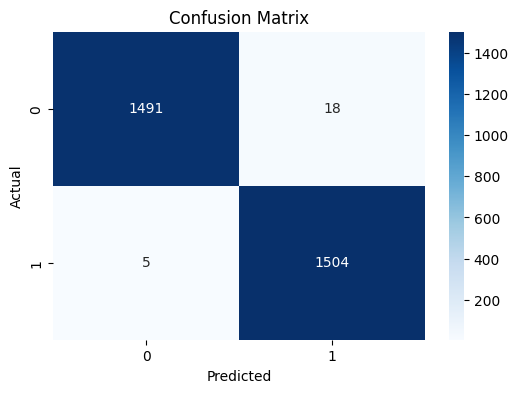

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation accuracies: [0.98409543 0.98840292 0.99171637 0.99535963 0.99403381]
Mean CV accuracy: 0.9907216297837766
Standard deviation: 0.004068268891284669


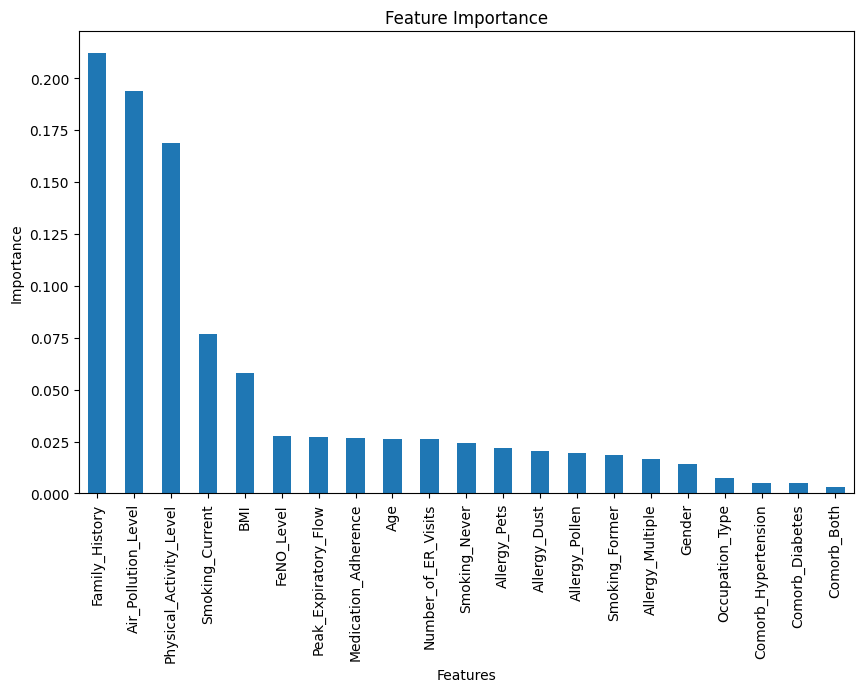

In [ ]:
impt = model.feature_importances_

feature_importance = pd.Series(impt, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
def predict_asthma(model, patient_data):
    df = pd.DataFrame([patient_data])

    # Preprocess
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1, 'Other':2})

    smoking_dummies = pd.get_dummies(df['Smoking_Status'], prefix='Smoking').astype(int)
    df = pd.concat([df, smoking_dummies], axis=1)
    df.drop(columns=['Smoking_Status'], inplace=True)

    df['Air_Pollution_Level'] = df['Air_Pollution_Level'].str.strip().str.title()
    df['Air_Pollution_Level'] = df['Air_Pollution_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

    df['Physical_Activity_Level'] = df['Physical_Activity_Level'].str.strip().str.title()
    df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})

    df['Occupation_Type'] = df['Occupation_Type'].str.strip().str.title()
    df['Occupation_Type'] = df['Occupation_Type'].map({'Indoor': 0, 'Outdoor': 1})

    comorb_dummies = pd.get_dummies(df['Comorbidities'], prefix='Comorb').astype(int)
    df = pd.concat([df, comorb_dummies], axis=1)
    df = df.drop('Comorbidities', axis=1)

    expected_cols = X_train.columns
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[expected_cols]

    # Predict
    return 'Has Asthma...' if model.predict(df)[0] == 1 else 'No Asthma!'

In [ ]:
new_patient = {
    "Age": 16,
    "Gender": "Male",
    "BMI": 22.4,
    "Smoking_Status": "Never",
    "Family_History": 1,
    "Allergies": "Dust",
    "Air_Pollution_Level": "High",
    "Physical_Activity_Level": "Sedentary",
    "Occupation_Type": "Indoor",
    "Comorbidities": "None",
    "Medication_Adherence": 0.75,
    "Number_of_ER_Visits": 1,
    "Peak_Expiratory_Flow": 420,
    "FeNO_Level": 25
}

print(predict_asthma(model, new_patient))

Has Asthma...


In [178]:
import joblib

model_columns = X_train.columns

joblib.dump(model_columns, 'model_columns.pkl')
joblib.dump(model, 'asthma_prediction_model.pkl')

['asthma_prediction_model.pkl']